### Importing needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataframe

In [3]:
df = pd.read_excel("populationByCountry.xlsx")

### Data discovery

In [4]:
df.head()

,#,Country (or dependency),Population,Yearly,Net,Density,Land Area,Migrants,Fert.,Med.,Urban,World
0,NaN,NaN,-2020,Change,Change,(P/Km²),(Km²),(net),Rate,Age,Pop %,Share
1,1.0,China,1439323776,0.0039,5540090,153,9388211,-348399,1.7,38,0.61,0.1847
2,2.0,India,1380004385,0.0099,13586631,464,2973190,-532687,2.2,28,0.35,0.177
3,3.0,United States,331002651,0.0059,1937734,36,9147420,954806,1.8,38,0.83,0.0425
4,4.0,Indonesia,273523615,0.0107,2898047,151,1811570,-98955,2.3,30,0.56,0.0351


In [87]:
df.describe()

,#,Population
count,235.000000,2.360000e+02
mean,118.000000,3.303064e+07
std,67.982841,1.348664e+08
min,1.000000,-2.020000e+03
25%,59.500000,3.995000e+05
50%,118.000000,5.440442e+06
75%,176.500000,2.041394e+07
max,235.000000,1.439324e+09


In [88]:
df.columns

Index(['#', 'Country (or dependency)', 'Population', 'Yearly', 'Net',
       'Density', 'Land Area', 'Migrants', 'Fert.', 'Med.', 'Urban', 'World'],
      dtype='object')

In [89]:
df.shape

(236, 12)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        235 non-null    float64
 1   Country (or dependency)  235 non-null    object 
 2   Population               236 non-null    int64  
 3   Yearly                   236 non-null    object 
 4   Net                      236 non-null    object 
 5   Density                  236 non-null    object 
 6   Land Area                236 non-null    object 
 7   Migrants                 202 non-null    object 
 8   Fert.                    236 non-null    object 
 9   Med.                     236 non-null    object 
 10  Urban                    236 non-null    object 
 11  World                    236 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 22.2+ KB


In [91]:
df =  df.rename(columns={"Population":"Population 2020", 
                         "Yearly":"Yearly change",
                         "Net": "Net change",
                         "Density":"Density (P/Km²)",
                         "Land Area": "Land Area(Km²)",
                        "Migrants" : "Migrants(net)",
                        "Fert." : "Fert Rate",
                        "Med." : "Med Age",
                        "Urban" : "Urban Pop%",
                        "World" : "World Share"})

In [92]:
df.head()

,#,Country (or dependency),Population 2020,Yearly change,Net change,Density (P/Km²),Land Area(Km²),Migrants(net),Fert Rate,Med Age,Urban Pop%,World Share
0,NaN,NaN,-2020,Change,Change,(P/Km²),(Km²),(net),Rate,Age,Pop %,Share
1,1.0,China,1439323776,0.0039,5540090,153,9388211,-348399,1.7,38,0.61,0.1847
2,2.0,India,1380004385,0.0099,13586631,464,2973190,-532687,2.2,28,0.35,0.177
3,3.0,United States,331002651,0.0059,1937734,36,9147420,954806,1.8,38,0.83,0.0425
4,4.0,Indonesia,273523615,0.0107,2898047,151,1811570,-98955,2.3,30,0.56,0.0351


In [93]:
### Dropping first row
df = df.drop([0], axis = 0)


### Dropping first column
df = df.drop("#", axis = 1)

In [94]:
df.isnull().sum()

Country (or dependency)     0
Population 2020             0
Yearly change               0
Net change                  0
Density (P/Km²)             0
Land Area(Km²)              0
Migrants(net)              34
Fert Rate                   0
Med Age                     0
Urban Pop%                  0
World Share                 0
dtype: int64

In [95]:
df["Fert Rate"].value_counts()

N.A.    34
1.8     14
1.5     12
2.1     10
1.9     10
1.7     10
2.3     10
1.6      9
2        9
2.4      9
1.3      8
2.8      7
1.4      7
2.2      6
3.6      6
4.4      5
2.9      5
4.7      5
2.5      5
4.1      4
3        4
4.6      4
1.2      4
4.3      3
3.7      3
4.9      3
3.4      2
3.8      2
3.9      2
4.5      2
4.8      1
3.2      1
2.7      1
5.3      1
6.1      1
5.5      1
4.2      1
4        1
5.4      1
5.8      1
5.9      1
5.2      1
7        1
3.1      1
5        1
1.1      1
3.5      1
6        1
3.3      1
2.6      1
5.6      1
Name: Fert Rate, dtype: int64

In [96]:
df["Med Age"].value_counts()

N.A.    34
19      14
28      12
43      11
32      11
42      10
18      10
20       9
30       8
38       7
26       7
40       7
22       7
24       6
17       6
34       6
31       6
45       5
21       5
29       5
41       5
44       5
33       5
23       4
25       4
27       4
37       4
36       4
35       3
46       3
39       3
47       2
15       1
16       1
48       1
Name: Med Age, dtype: int64

In [97]:
def applicable(data):
    empty_data = pd.DataFrame(columns = df.columns)
    for column in data.columns:
        if data[data[column] == "N.A."].size != 0:
            df1 = data[data[column] == "N.A."]
            empty_data = pd.concat([empty_data,df1])
    return empty_data
            

In [98]:
dirty_data = applicable(df)
dirty_data

,Country (or dependency),Population 2020,Yearly change,Net change,Density (P/Km²),Land Area(Km²),Migrants(net),Fert Rate,Med Age,Urban Pop%,World Share
202,Isle of Man,85033,0.0053,449,149,570,NaN,N.A.,N.A.,0.53,0
203,Andorra,77265,0.0016,123,164,470,NaN,N.A.,N.A.,0.88,0
204,Dominica,71986,0.0025,178,96,750,NaN,N.A.,N.A.,0.74,0
205,Cayman Islands,65722,0.0119,774,274,240,NaN,N.A.,N.A.,0.97,0
206,Bermuda,62278,-0.0036,-228,1246,50,NaN,N.A.,N.A.,0.97,0
...,...,...,...,...,...,...,...,...,...,...,...
219,Gibraltar,33691,-0.0003,-10,3369,10,NaN,N.A.,N.A.,N.A.,0
222,Palau,18094,0.0048,86,39,460,NaN,N.A.,N.A.,N.A.,0
224,Anguilla,15003,0.009,134,167,90,NaN,N.A.,N.A.,N.A.,0
227,Nauru,10824,0.0063,68,541,20,NaN,N.A.,N.A.,N.A.,0


In [99]:
### Replacing invalid values with Nan
df = df.replace("N.A.", np.NaN)
df

,Country (or dependency),Population 2020,Yearly change,Net change,Density (P/Km²),Land Area(Km²),Migrants(net),Fert Rate,Med Age,Urban Pop%,World Share
1,China,1439323776,0.0039,5540090,153,9388211,-348399.0,1.7,38.0,0.61,0.1847
2,India,1380004385,0.0099,13586631,464,2973190,-532687.0,2.2,28.0,0.35,0.1770
3,United States,331002651,0.0059,1937734,36,9147420,954806.0,1.8,38.0,0.83,0.0425
4,Indonesia,273523615,0.0107,2898047,151,1811570,-98955.0,2.3,30.0,0.56,0.0351
5,Pakistan,220892340,0.0200,4327022,287,770880,-233379.0,3.6,23.0,0.35,0.0283
...,...,...,...,...,...,...,...,...,...,...,...
231,Montserrat,4992,0.0006,3,50,100,NaN,NaN,NaN,0.10,0.0000
232,Falkland Islands,3480,0.0305,103,0,12170,NaN,NaN,NaN,0.66,0.0000
233,Niue,1626,0.0068,11,6,260,NaN,NaN,NaN,0.46,0.0000
234,Tokelau,1357,0.0127,17,136,10,NaN,NaN,NaN,0.00,0.0000


In [100]:
df["Med Age"] = df["Med Age"].fillna(method = "ffill")
df["Fert Rate"] = df["Fert Rate"].fillna(method = "ffill")

In [101]:
df[df["Urban Pop%"].isna()]

,Country (or dependency),Population 2020,Yearly change,Net change,Density (P/Km²),Land Area(Km²),Migrants(net),Fert Rate,Med Age,Urban Pop%,World Share
50,Venezuela,28435940,-0.0028,-79889,32,882050,-653249.0,2.3,30.0,NaN,0.0036
104,Hong Kong,7496981,0.0082,60827,7140,1050,29308.0,1.3,45.0,NaN,0.0010
114,Singapore,5850342,0.0079,46005,8358,700,27028.0,1.2,42.0,NaN,0.0008
129,Kuwait,4270571,0.0151,63488,240,17820,39520.0,2.1,37.0,NaN,0.0005
141,Puerto Rico,2860853,-0.0247,-72555,323,8870,-97986.0,1.2,44.0,NaN,0.0004
167,Macao,649335,0.0139,8890,21645,30,5000.0,1.2,39.0,NaN,0.0001
177,Guadeloupe,400124,0.0002,68,237,1690,-1440.0,2.2,44.0,NaN,0.0001
214,Monaco,39242,0.0071,278,26337,1,NaN,2.0,34.0,NaN,0.0000
219,Gibraltar,33691,-0.0003,-10,3369,10,NaN,2.0,34.0,NaN,0.0000
222,Palau,18094,0.0048,86,39,460,NaN,2.0,34.0,NaN,0.0000


In [102]:
df["Urban Pop%"] = df["Urban Pop%"].fillna(0)

In [103]:
df[df["Migrants(net)"].isna()].shape

(34, 11)

In [106]:
df[df["Migrants(net)"].isna()]

,Country (or dependency),Population 2020,Yearly change,Net change,Density (P/Km²),Land Area(Km²),Migrants(net),Fert Rate,Med Age,Urban Pop%,World Share
202,Isle of Man,85033,0.0053,449,149,570,NaN,2.0,34.0,0.53,0.0
203,Andorra,77265,0.0016,123,164,470,NaN,2.0,34.0,0.88,0.0
204,Dominica,71986,0.0025,178,96,750,NaN,2.0,34.0,0.74,0.0
205,Cayman Islands,65722,0.0119,774,274,240,NaN,2.0,34.0,0.97,0.0
206,Bermuda,62278,-0.0036,-228,1246,50,NaN,2.0,34.0,0.97,0.0
207,Marshall Islands,59190,0.0068,399,329,180,NaN,2.0,34.0,0.70,0.0
208,Northern Mariana Islands,57559,0.0060,343,125,460,NaN,2.0,34.0,0.88,0.0
209,Greenland,56770,0.0017,98,0,410450,NaN,2.0,34.0,0.87,0.0
210,American Samoa,55191,-0.0022,-121,276,200,NaN,2.0,34.0,0.88,0.0
211,Saint Kitts & Nevis,53199,0.0071,376,205,260,NaN,2.0,34.0,0.33,0.0


In [107]:
df["Migrants(net)"] = df["Migrants(net)"].fillna(0)

In [108]:
df.isna().sum()

Country (or dependency)    0
Population 2020            0
Yearly change              0
Net change                 0
Density (P/Km²)            0
Land Area(Km²)             0
Migrants(net)              0
Fert Rate                  0
Med Age                    0
Urban Pop%                 0
World Share                0
dtype: int64

In [109]:
### checking if Density was correctly calculated
df["Density (P/Km²)"] == np.rint(df["Population 2020"] / df["Land Area(Km²)"])

1       True
2       True
3       True
4       True
5       True
       ...  
231     True
232     True
233     True
234     True
235    False
Length: 235, dtype: bool

In [110]:
### Getting observations with invalid Land Area values

In [111]:
df[df["Land Area(Km²)"] <= 0]

,Country (or dependency),Population 2020,Yearly change,Net change,Density (P/Km²),Land Area(Km²),Migrants(net),Fert Rate,Med Age,Urban Pop%,World Share
235,Holy See,801,0.0025,2,2003,0,0.0,2.0,34.0,0.0,0.0


In [112]:
### Dropping observations with invalid Land Area values

In [113]:
df.drop(235, inplace = True)

In [114]:
# Doing the right calculations for the Density feature

In [115]:
    ### Getting observations with invalid Population values
df[df["Population 2020"] <= 0]

,Country (or dependency),Population 2020,Yearly change,Net change,Density (P/Km²),Land Area(Km²),Migrants(net),Fert Rate,Med Age,Urban Pop%,World Share


In [116]:
### Assigning Density (P/Km²) to its correct value
df["Density (P/Km²)"] = np.rint(df["Population 2020"] / df["Land Area(Km²)"])

In [117]:
### Getting rows with invalid Density (P/Km²)
df2 = df['Density (P/Km²)'] <= 0
df[df2]

,Country (or dependency),Population 2020,Yearly change,Net change,Density (P/Km²),Land Area(Km²),Migrants(net),Fert Rate,Med Age,Urban Pop%,World Share
209,Greenland,56770,0.0017,98,0.0,410450,0.0,2.0,34.0,0.87,0.0
232,Falkland Islands,3480,0.0305,103,0.0,12170,0.0,2.0,34.0,0.66,0.0


In [118]:
### Dropping rows with invalid Density (P/Km²)
df.drop([209,232], axis = 0, inplace = True)

### Univariate Analysis

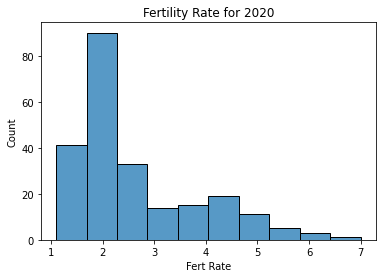

In [119]:
sns.histplot(data = df, x = "Fert Rate", bins = 10)
plt.title("Fertility Rate for 2020");

Text(0.5, 1.0, 'Fertility Rate for 2020')

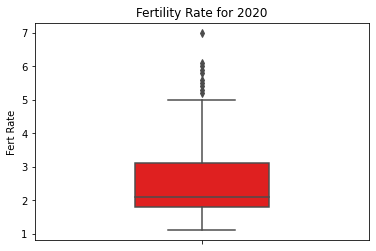

In [120]:
sns.boxplot(y = df["Fert Rate"], width = 0.4, color = 'r')
plt.title("Fertility Rate for 2020")

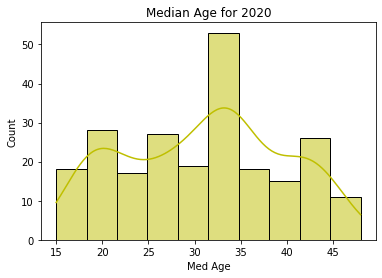

In [121]:
sns.histplot(data = df, x = "Med Age", bins = 10, color = 'y', kde = True)
plt.title("Median Age for 2020");

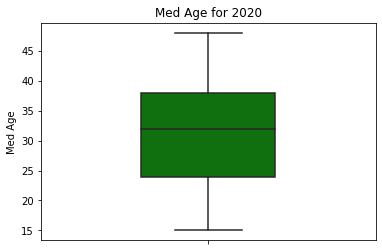

In [122]:
sns.boxplot(y = df["Med Age"], width = 0.4, color = 'g')
plt.title("Med Age for 2020");

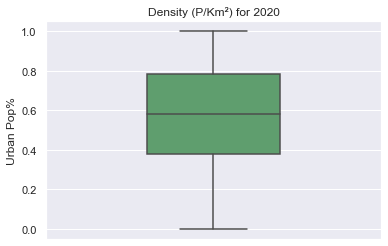

In [161]:
sns.boxplot(y = df["Urban Pop%"], width = 0.4, color = 'g')
plt.title("Density (P/Km²) for 2020");

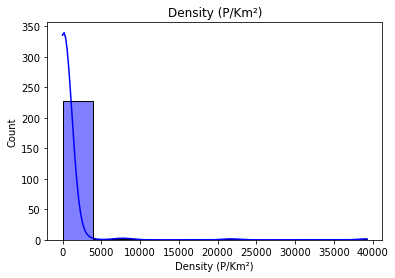

In [133]:
sns.histplot(data = df, x = "Density (P/Km²)", bins = 10, color = 'b', kde = True)
plt.title("Density (P/Km²)");

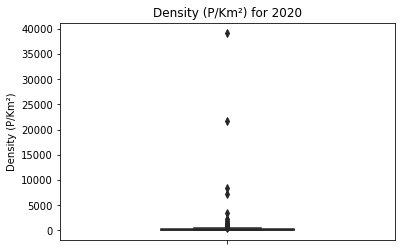

In [132]:
sns.boxplot(y = df["Density (P/Km²)"], width = 0.4, color = 'g')
plt.title("Density (P/Km²) for 2020");

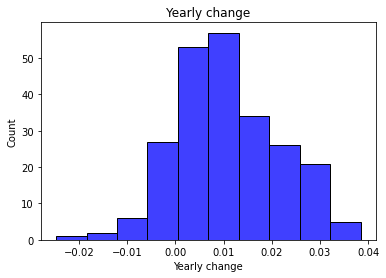

In [130]:
sns.histplot(data = df, x = "Yearly change", bins = 10, color = 'b')
plt.title("Yearly change");

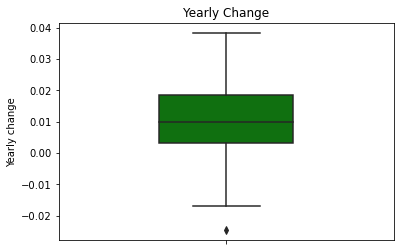

In [137]:
sns.boxplot(y = df["Yearly change"], width = 0.4, color = 'g')
plt.title("Yearly Change");

### Bivariate Analysis

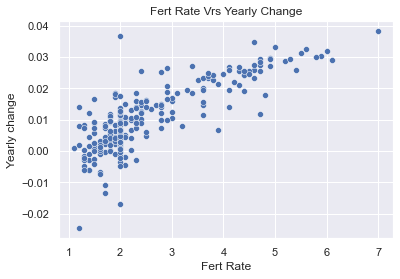

In [142]:
sns.set_theme(style="darkgrid")
sns.scatterplot(y = "Yearly change", x = "Fert Rate", data = df)
plt.title("Fert Rate Vrs Yearly Change");

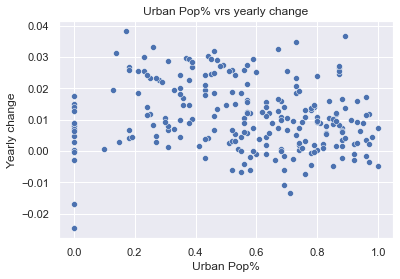

In [174]:

sns.set_theme(style="darkgrid")
sns.scatterplot(y = "Yearly change", x = "Urban Pop%", data = df)
plt.title("Urban Pop% vrs yearly change");

There is a very low correlation between Yearly change and Urban Pop %

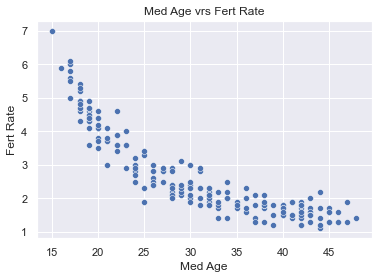

In [175]:
sns.set_theme(style="darkgrid")
sns.scatterplot(x = "Med Age", y = "Fert Rate", data = df)
plt.title("Med Age vrs Fert Rate");

### Why some countries has more emigrants than immigrants(negative migrants(net))?

In [152]:
### Slicing column with negative migrants(net)
neg_migrants = df[df["Migrants(net)"] < 0]

In [163]:
neg_migrants.describe()

,Population 2020,Yearly change,Net change,Density (P/Km²),Land Area(Km²),Migrants(net),Fert Rate,Med Age,Urban Pop%,World Share
count,1.130000e+02,113.000000,1.130000e+02,113.000000,1.130000e+02,113.000000,113.000000,113.000000,113.000000,113.000000
mean,4.772783e+07,0.012187,5.247285e+05,156.557522,4.569392e+05,-43144.637168,3.005310,27.946903,0.512566,0.006119
std,1.889739e+08,0.011314,1.534994e+06,194.696418,1.029586e+06,101532.449959,1.203777,8.598007,0.210224,0.024244
min,9.834700e+04,-0.024700,-1.268660e+05,2.000000,3.400000e+02,-653249.000000,1.200000,16.000000,0.000000,0.000000
25%,2.142249e+06,0.004400,1.621000e+03,47.000000,2.467000e+04,-35000.000000,2.100000,20.000000,0.360000,0.000300
50%,7.976983e+06,0.012100,8.951600e+04,83.000000,1.204100e+05,-9215.000000,2.700000,27.000000,0.530000,0.001000
75%,2.141325e+07,0.022000,4.475630e+05,214.000000,4.727100e+05,-2803.000000,4.100000,34.000000,0.640000,0.002700
max,1.439324e+09,0.030200,1.358663e+07,1265.000000,9.388211e+06,-79.000000,6.100000,47.000000,1.000000,0.184700


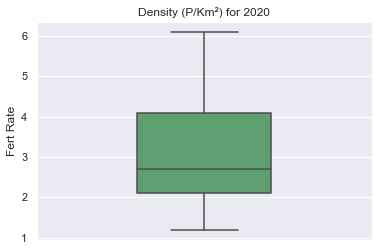

In [156]:
sns.boxplot(y = neg_migrants["Fert Rate"], width = 0.4, color = 'g')
plt.title("Density (P/Km²) for 2020");

In [173]:
### Getting countries with negative yearly change in population
decrease_pop = df[df["Yearly change"] < 0]

In [165]:
decrease_pop

,Country (or dependency),Population 2020,Yearly change,Net change,Density (P/Km²),Land Area(Km²),Migrants(net),Fert Rate,Med Age,Urban Pop%,World Share
11,Japan,126476461,-0.0030,-383840,347.0,364555,71560.0,1.4,48.0,0.92,0.0162
23,Italy,60461826,-0.0015,-88249,206.0,294140,148943.0,1.3,47.0,0.69,0.0078
35,Ukraine,43733762,-0.0059,-259876,75.0,579320,10000.0,1.4,41.0,0.69,0.0056
38,Poland,37846611,-0.0011,-41157,124.0,306230,-29395.0,1.4,42.0,0.60,0.0049
50,Venezuela,28435940,-0.0028,-79889,32.0,882050,-653249.0,2.3,30.0,0.00,0.0036
61,Romania,19237691,-0.0066,-126866,84.0,230170,-73999.0,1.6,43.0,0.55,0.0025
83,Cuba,11326616,-0.0006,-6867,106.0,106440,-14400.0,1.6,42.0,0.78,0.0015
87,Greece,10423054,-0.0048,-50401,81.0,128900,-16000.0,1.3,46.0,0.85,0.0013
89,Portugal,10196709,-0.0029,-29478,111.0,91590,-6000.0,1.3,46.0,0.66,0.0013
94,Hungary,9660351,-0.0025,-24328,107.0,90530,6000.0,1.5,43.0,0.72,0.0012


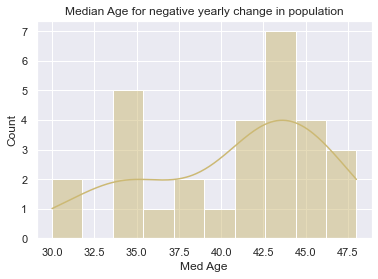

In [172]:
sns.histplot(data = decrease_pop, x = "Med Age", bins = 10, color = 'y', kde = True)
plt.title("Median Age for negative yearly change in population");

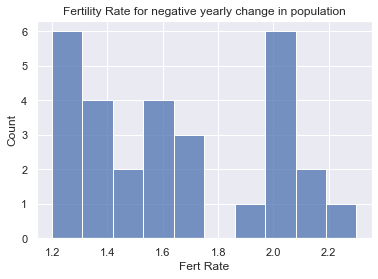

In [170]:
sns.histplot(data = decrease_pop, x = "Fert Rate", bins = 10)
plt.title("Fertility Rate for negative yearly change in population");